## Libraries

In [3]:
#import pandas numpy and scipy libraries
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [4]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()#this is to override the matplotlib look with the seaborn look

## Import Data

In [5]:
df_segmentation = pd.read_csv('segmentation data.csv', index_col = 0)

## Explore Data

In [6]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [7]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Correlation Estimate

In [8]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


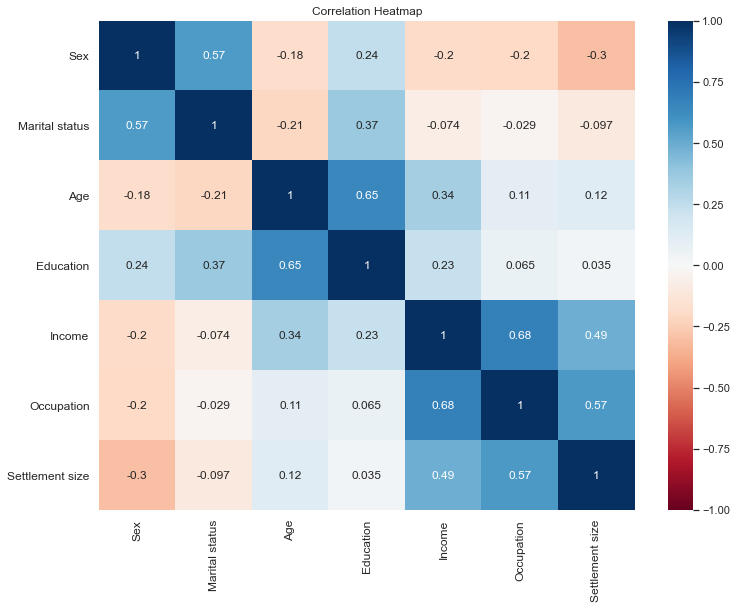

In [9]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(),rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

## Visualize Raw Data

Text(0.5, 1.0, 'Visualization of raw data')

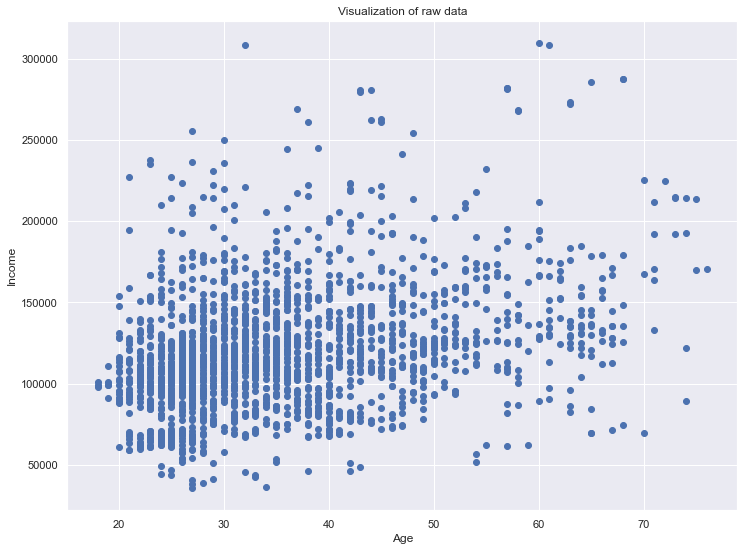

In [10]:
plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel("Income")
plt.title('Visualization of raw data')

## Standardization

In [11]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## Hierarchical Clustering

In [12]:
hier_clust = linkage(segmentation_std, method = 'ward')

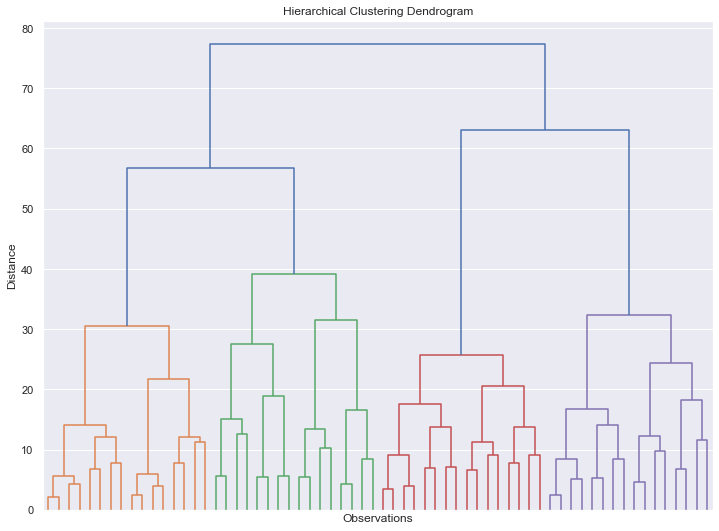

In [13]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
          show_leaf_counts = False,
          no_labels = True,
          )
plt.show()

In [14]:
#Rule of thumb for cutting the dendrogram: Find the longest vertical line unintercepted by a horizontal line 
# from the dendrogram


## K-means Clustering

In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

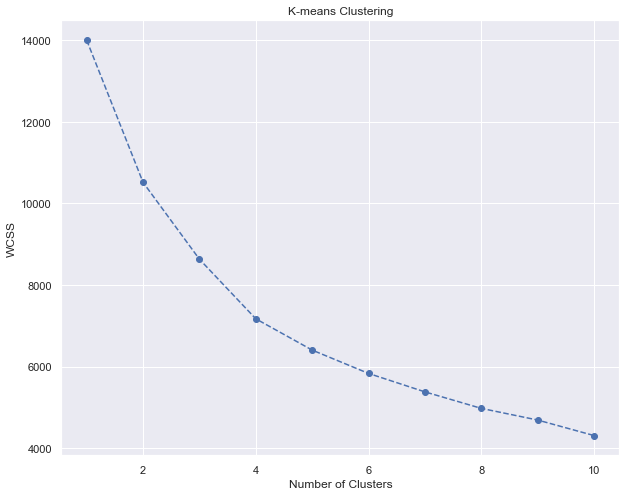

In [16]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means Clustering")
plt.show()

In [17]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [18]:
# We divide our data into the four clusters
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## Results

In [19]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_
df_segm_kmeans.head(15)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
100000006,0,0,35,1,144848,0,0,1
100000007,0,0,53,1,156495,1,1,2
100000008,0,0,35,1,193621,2,1,2
100000009,0,1,61,2,151591,0,0,0


In [20]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [21]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()
#Note above we need to include a sceond argument (column) in order to count each row in the table. Here we selected Sex.
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [22]:
df_segm_analysis.rename({0: 'well-off',
                        1: 'fewer-opportunities',
                        2: 'career focused',
                        3: 'standard'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [23]:
#Add the segment labels to our table
df_segm_kmeans['labels'] = df_segm_kmeans['Segment K-means'].map({0: 'well-off',
                        1: 'fewer-opportunities',
                        2: 'career focused',
                        3: 'standard'})
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well-off
100000002,1,1,22,1,150773,1,2,3,standard
100000003,0,0,49,1,89210,0,0,1,fewer-opportunities
100000004,0,0,45,1,171565,1,1,2,career focused
100000005,0,0,53,1,149031,1,1,2,career focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,fewer-opportunities
100001997,1,1,27,1,117744,1,0,3,standard
100001998,0,0,31,0,86400,0,0,1,fewer-opportunities


C:\Users\MOHAMED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


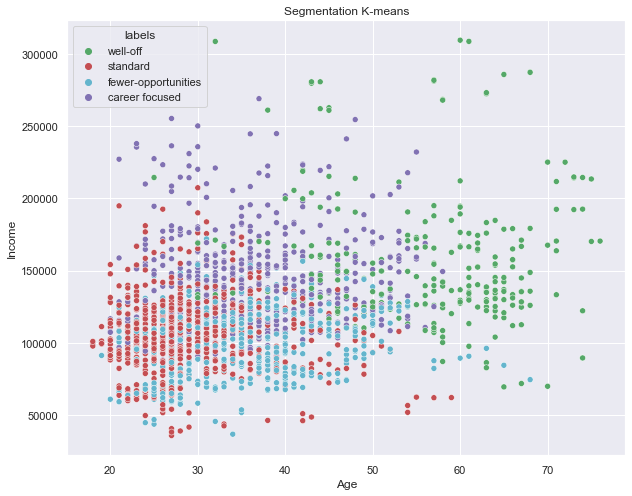

In [24]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

## PCA

In [25]:
pca = PCA()

In [26]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

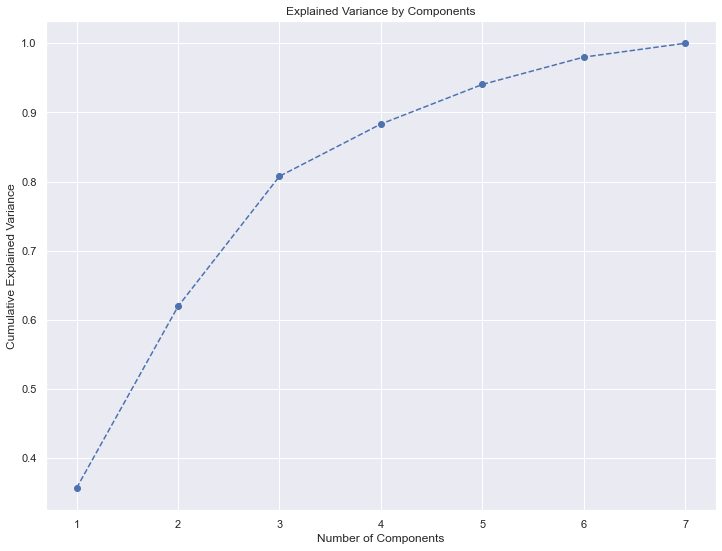

In [28]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
#Rule of Thumb" keep at least 70 to 80 % of the variance

In [29]:
pca = PCA(n_components = 3)

In [30]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## PCA Results

In [31]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [32]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns = df_segmentation.columns.values,
                          index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x22b579d80d0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

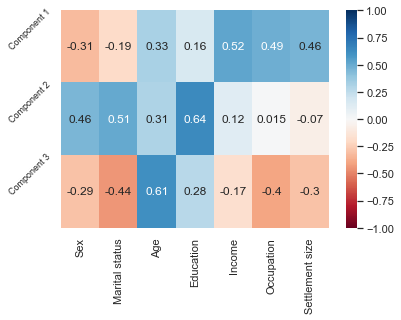

In [33]:
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap ="RdBu",
           annot = True)
plt.yticks([0, 1, 2],
          ['Component 1', 'Component 2', 'Component 3'],
          rotation = 45,
           fontsize = 9) 

In [34]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [35]:
scores_pca = pca.transform(segmentation_std)

In [36]:
scores_pca = pca.transform(segmentation_std)

## K-means clustering with PCA

In [37]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

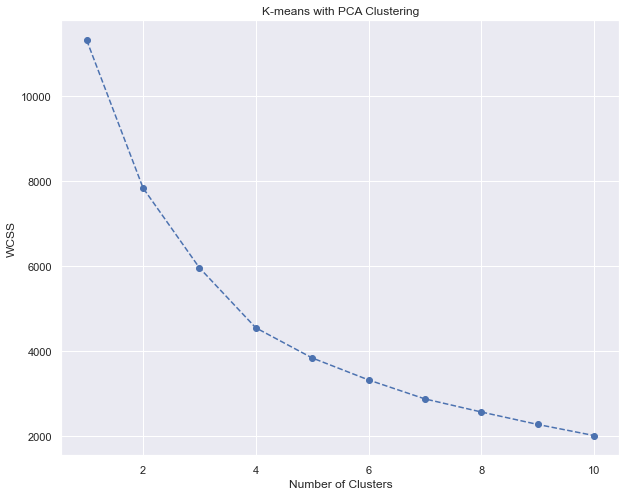

In [38]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means with PCA Clustering")
plt.show()

In [39]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [40]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [41]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [42]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [43]:
df_segm_pca_kmeans_freq['N Obs']= df_segm_pca_kmeans[['Segment K-means PCA', 'Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'well off',
                                                         1: 'fewer opportunities',
                                                         2: 'standard',
                                                         3: 'career focused'})


In [44]:
df_segm_pca_kmeans_freq


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
well off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
fewer opportunities,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
standard,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [45]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'well off',
                                                         1: 'fewer opportunities',
                                                         2: 'standard',
                                                         3: 'career focused'})

C:\Users\MOHAMED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clusters by PCA Components ')

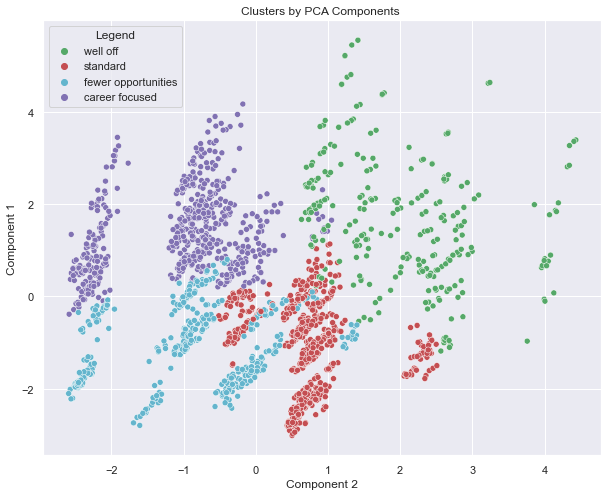

In [46]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm']  )
plt.title('Clusters by PCA Components ')

In [47]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0,well off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1,fewer opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3,career focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1,fewer opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1,fewer opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2,standard


## Data Export

In [49]:
# Here we save the objects we will need for Purchase Analytics. We export them using pickle objects.
# We need the scaler, pca and kmeans_pca objects to preprocess and segment the purchase data set
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [51]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [52]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))